<a href="https://colab.research.google.com/github/ShriramGithub7/EVA-7/blob/main/CIFAR10_resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/CNN-Master/
!ls /content/CNN-Master/



/content/CNN-Master
main.py  model	__pycache__  README.md	utils


In [2]:
!rm -rf /content/CNN-Master/
%cd /content/
!git clone https://github.com/ShriramGithub7/CNN-Master.git

/content
Cloning into 'CNN-Master'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 322 (delta 60), reused 0 (delta 0), pack-reused 189
Receiving objects: 100% (322/322), 69.87 KiB | 4.99 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [3]:
!git pull

fatal: not a git repository (or any of the parent directories): .git


In [4]:
!pip install --upgrade --force-reinstall --no-deps albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.0
    Uninstalling albumentations-1.3.0:
      Successfully uninstalled albumentations-1.3.0


In [5]:
%cd /content/CNN-Master/utils/

/content/CNN-Master/utils


In [6]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from dataTransform import *

trainset = CIFAR10Dataset(train=True)
testset = CIFAR10Dataset(train=False)

data = CIFAR10DataLoader(trainset, testset)

trainloader = data.train_loader
testloader = data.test_loader


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
classes = trainset.classes
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [9]:
#trainloader.data_stats()

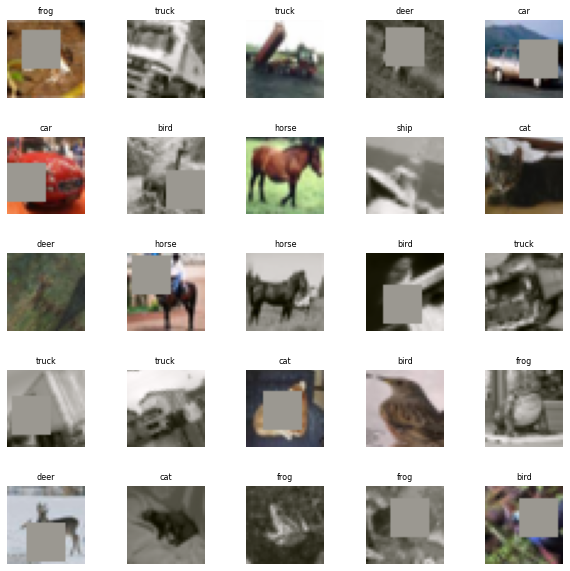

In [10]:
data.show_sample(data.train_loader)



In [11]:
%cd /content/CNN-Master/

/content/CNN-Master


In [12]:
%cd /content/CNN-Master/
!touch /content/CNN-Master/model/__init__.py
from model.resnet import *

/content/CNN-Master


In [13]:
net = ResNet18()

In [14]:
import torch
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)


net = net.to(device)
#device = torch.device("cpu")
print(device)

CUDA Available: True
cuda


In [15]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
    

In [16]:
# Load train and test model
from main import fit_model

net, history = fit_model(net, trainloader, testloader, num_epochs=2, l1=True)


EPOCH: 1


Loss=-578679342213168535772856320.00 Batch_id=781 Accuracy=11.92: 100%|██████████| 782/782 [00:57<00:00, 13.71it/s]



Test set: Average loss: -643273166133897029931237376.0000, Accuracy: 1000/10000 (10.00%)

EPOCH: 2


Loss=nan Batch_id=781 Accuracy=9.93: 100%|██████████| 782/782 [00:52<00:00, 14.77it/s]



Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)



In [17]:
print(type(trainloader))

<class 'torch.utils.data.dataloader.DataLoader'>
